In [1]:
import pandas as pd
import numpy as np
import collections

In [2]:
import pandas_datareader.data as web
stock = web.DataReader('CCL', 'stooq')


In [3]:
stock

,Open,High,Low,Close,Volume
Date,,,,,
2022-03-11,17.925,18.000,17.180,17.210,28443519
2022-03-10,16.820,18.230,16.710,17.650,42701108
2022-03-09,16.910,17.780,16.850,17.270,58123210
2022-03-08,15.680,16.550,14.940,15.880,68268984
2022-03-07,17.300,17.480,15.520,15.530,67688568
...,...,...,...,...,...
2017-03-17,52.151,52.342,51.999,52.051,4204136
2017-03-16,51.717,52.007,51.637,51.960,2403791
2017-03-15,51.519,51.960,51.383,51.807,2645671


# DTC


In [4]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


In [11]:
stock['Future'] = stock['High'].rolling(window = 30).mean()[::-1].shift(19)
stock['Future']

Date
2022-03-11   NaN
2022-03-10   NaN
2022-03-09   NaN
2022-03-08   NaN
2022-03-07   NaN
              ..
2017-03-17   NaN
2017-03-16   NaN
2017-03-15   NaN
2017-03-14   NaN
2017-03-13   NaN
Name: Future, Length: 1260, dtype: float64

In [16]:
stock['Return'] = stock['High'].pct_change(50).shift(-100)
features = ['High','Volume']

In [17]:
stock_test = stock[1000: :]
stock_train = stock[0:1000:]
# first 1000 days for training and 258days for testing

In [18]:
stock_test


,Open,High,Low,Close,Volume,Future,Return
Date,,,,,,,
2018-03-22,63.665,64.028,61.118,61.330,6639393,62.150867,-0.023431
2018-03-21,62.887,63.137,61.905,62.128,4950369,62.261100,-0.001196
2018-03-20,63.009,63.878,62.731,62.857,4538846,62.395567,-0.017109
2018-03-19,62.229,62.999,62.054,62.656,3753157,62.533533,-0.019750
2018-03-16,61.905,62.137,61.451,61.989,4269285,62.669000,-0.013530
...,...,...,...,...,...,...,...
2017-03-17,52.151,52.342,51.999,52.051,4204136,NaN,NaN
2017-03-16,51.717,52.007,51.637,51.960,2403791,NaN,NaN
2017-03-15,51.519,51.960,51.383,51.807,2645671,NaN,NaN


In [19]:
x_train = stock_train[features]
x_test= stock_test[features]

y_train = np.where(stock_train.Return > 0,1,0)
y_test = np.where(stock_test.Return> 0,1,0)

In [20]:
TC = DecisionTreeClassifier(max_depth=3,min_samples_leaf=6)
TC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [21]:
y_pred = TC.predict(x_test)

In [22]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.49      0.62       212
           1       0.20      0.56      0.30        48

    accuracy                           0.50       260
   macro avg       0.52      0.53      0.46       260
weighted avg       0.72      0.50      0.56       260



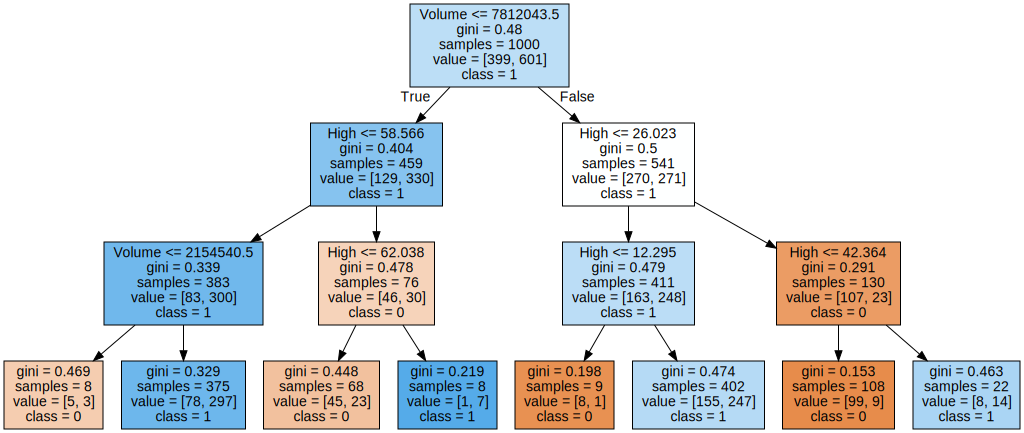

In [23]:
from sklearn import tree 
import graphviz
data = tree.export_graphviz(TC,filled=True,feature_names=features,class_names=np.array(['0','1']))
graphviz.Source(data)

# SVR

In [24]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from datetime import datetime

In [25]:
stock_svr = stock.reset_index()

In [26]:
dates = stock_svr.index.tolist()
dates_arr = [[i]for i in dates]

In [27]:
High = stock['High'].tolist()

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dates_arr, High, test_size = 0.25)

In [29]:
lin_svr = SVR(kernel='linear')

poly_svr = SVR(kernel='poly', C=1000.0, degree = 2)

rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)

In [30]:
lin_svr.fit(x_train,y_train)
poly_svr.fit(x_train,y_train)
rbf_svr.fit(x_train,y_train)

SVR(C=1000.0, gamma=0.15)

In [31]:
lin_svr_predict = lin_svr.predict(x_test)

print('Lin_svr:')
print('   r2 score: '+str(r2_score(y_test, lin_svr_predict)))
print('   RMSE : '+str(np.sqrt(mean_squared_error(y_test, lin_svr_predict))))
print("   Mean Absolute Error : " + str(mean_absolute_error(y_test, lin_svr_predict)))

Lin_svr:
   r2 score: 0.7765661499253347
   RMSE : 8.115981783476697
   Mean Absolute Error : 5.454358884139268


In [32]:
poly_svr_predict = poly_svr.predict(x_test)

print('poly_svr:')
print('   r2 score: '+str(r2_score(y_test, poly_svr_predict)))
print('   RMSE : '+str(np.sqrt(mean_squared_error(y_test, poly_svr_predict))))
print("   Mean Absolute Error : " + str(mean_absolute_error(y_test, lin_svr_predict)))

poly_svr:
   r2 score: 0.6962159466383999
   RMSE : 9.46344070505221
   Mean Absolute Error : 5.454358884139268


In [33]:
rbf_svr_predict = rbf_svr.predict(x_test)

print('rbf_svr:')
print('   r2 score: '+str(r2_score(y_test, rbf_svr_predict)))
print('   RMSE : '+str(np.sqrt(mean_squared_error(y_test, rbf_svr_predict))))
print("   Mean Absolute Error : " + str(mean_absolute_error(y_test, rbf_svr_predict)))

rbf_svr:
   r2 score: 0.9907067193473681
   RMSE : 1.6552023926862385
   Mean Absolute Error : 0.9757178732620245
